In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../datasets/raw/used_cars_data.csv')

/tmp/ipykernel_75522/3566965223.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/raw/used_cars_data.csv')


In [3]:
df.shape

(3000040, 66)

In [4]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

None

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2.508755e+06,0.0,3.000040e+06,2.827654e+06,2.508755e+06,2.827654e+06,0.0,3.000040e+06,3.000040e+06,3.000040e+06,2.855653e+06,1.483027e+06,3.000040e+06,3.000040e+06,2.959168e+06,2.999944e+06,0.0,3.000040e+06
mean,2.269325e+01,NaN,7.605973e+01,2.968488e+03,2.947337e+01,2.479957e+02,NaN,3.698414e+01,2.754987e+08,-9.064224e+01,3.114690e+04,1.532644e+00,2.993337e+04,5.509768e+02,4.270413e+00,2.335224e+05,NaN,2.017728e+03
std,8.807024e+00,NaN,1.088839e+02,1.348905e+03,7.769252e+00,9.046639e+01,NaN,4.996819e+00,8.894123e+06,1.390589e+01,7.458675e+04,9.202928e-01,1.956617e+04,1.079448e+03,5.133017e-01,1.323221e+05,NaN,4.178701e+00
min,7.000000e+00,NaN,0.000000e+00,7.000000e+02,1.000000e+01,5.500000e+01,NaN,1.834670e+01,1.994620e+07,-1.579280e+02,0.000000e+00,1.000000e+00,1.650000e+02,0.000000e+00,1.000000e+00,4.159300e+04,NaN,1.915000e+03
25%,1.800000e+01,NaN,1.400000e+01,2.000000e+03,2.500000e+01,1.750000e+02,NaN,3.350920e+01,2.745794e+08,-9.708820e+01,6.000000e+00,1.000000e+00,1.845100e+04,0.000000e+00,4.000000e+00,6.337500e+04,NaN,2.017000e+03
50%,2.100000e+01,NaN,3.500000e+01,2.500000e+03,2.900000e+01,2.440000e+02,NaN,3.784710e+01,2.785453e+08,-8.724950e+01,8.267000e+03,1.000000e+00,2.647700e+04,0.000000e+00,4.341463e+00,2.816270e+05,NaN,2.020000e+03
75%,2.600000e+01,NaN,8.200000e+01,3.600000e+03,3.300000e+01,3.000000e+02,NaN,4.100620e+01,2.804553e+08,-8.045490e+01,4.366200e+04,2.000000e+00,3.822000e+04,7.850000e+02,4.605263e+00,3.366140e+05,NaN,2.020000e+03
max,1.270000e+02,NaN,3.599000e+03,8.400000e+03,1.270000e+02,1.001000e+03,NaN,6.120310e+01,2.820222e+08,-6.607850e+01,9.999999e+07,1.900000e+01,3.299995e+06,1.474140e+05,5.000000e+00,4.409510e+05,NaN,2.021000e+03


In [5]:
def profiling_dataset_transposed(df):
    # 1. Calcolo percentuale valori mancanti
    missing_pct = (df.isnull().sum() / len(df)) * 100
    
    # 2. Calcolo percentuale valori unici
    # (Numero di valori unici / Numero totale di righe) * 100
    unique_pct = (df.nunique() / len(df)) * 100
    
    # 3. Recupero dei tipi di dato (convertiti in stringa per leggibilità)
    dtypes = df.dtypes.astype(str)
    
    # Creazione del DataFrame con le righe richieste
    summary_df = pd.DataFrame([missing_pct, unique_pct, dtypes], 
                              index=['missing_values_%', 'unique_values_%', 'type'])
    
    return summary_df

In [6]:
# Applicazione ai tuoi DataFrame
df_stats = profiling_dataset_transposed(df)

# Visualizzazione
print("Analisi Dataset:")
display(df_stats)

Analisi Dataset:


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
missing_values_%,0.0,5.308896,99.347742,85.696924,85.696924,0.451427,97.882262,0.0,16.375948,100.0,0.0,0.0,2.596665,3.352655,5.746123,3.352655,1.665144,47.552533,47.552533,0.0,19.087579,5.308896,5.308896,2.75743,47.552533,5.308896,16.375948,5.746123,12.799363,47.552533,100.0,93.903481,0.0,95.487993,0.0,5.308896,0.0,0.0,0.0,0.0,12.302936,6.668178,0.0,5.308896,4.812836,0.0,50.566426,16.047319,0.0,47.552533,0.0,1.362382,0.0032,0.0,47.552533,17.259537,2.139471,2.139471,3.860849,3.876415,100.0,4.891001,4.891001,5.308896,5.308896,0.0
unique_values_%,99.998667,0.0073,0.0001,0.000033,0.002767,0.0003,0.000133,0.156231,0.003333,0.0,0.058466,0.307163,83.97638,0.0013,0.002233,0.0013,0.955454,0.000067,0.000067,0.000067,0.0016,0.003367,0.006067,0.000267,0.000067,0.015733,0.0033,0.015166,1.524146,0.000067,0.0,0.000033,0.000067,0.000033,0.781423,0.027866,0.058299,0.0005,99.998667,0.77469,80.527426,9.332276,0.003333,0.0004,6.585812,0.047633,0.0006,0.067899,2.961994,0.000067,0.361262,0.060566,0.903221,0.871588,0.000067,0.068666,0.000133,0.001467,1.377615,0.302063,0.0,0.000167,0.000167,0.0161,0.0095,0.003267
type,object,object,object,object,object,object,object,object,float64,float64,int64,object,object,object,float64,object,object,object,object,bool,object,object,object,object,object,object,float64,float64,object,object,float64,object,bool,object,float64,object,object,object,int64,float64,object,object,object,object,float64,object,float64,object,float64,object,int64,float64,float64,object,object,object,object,object,object,object,float64,object,object,object,object,int64


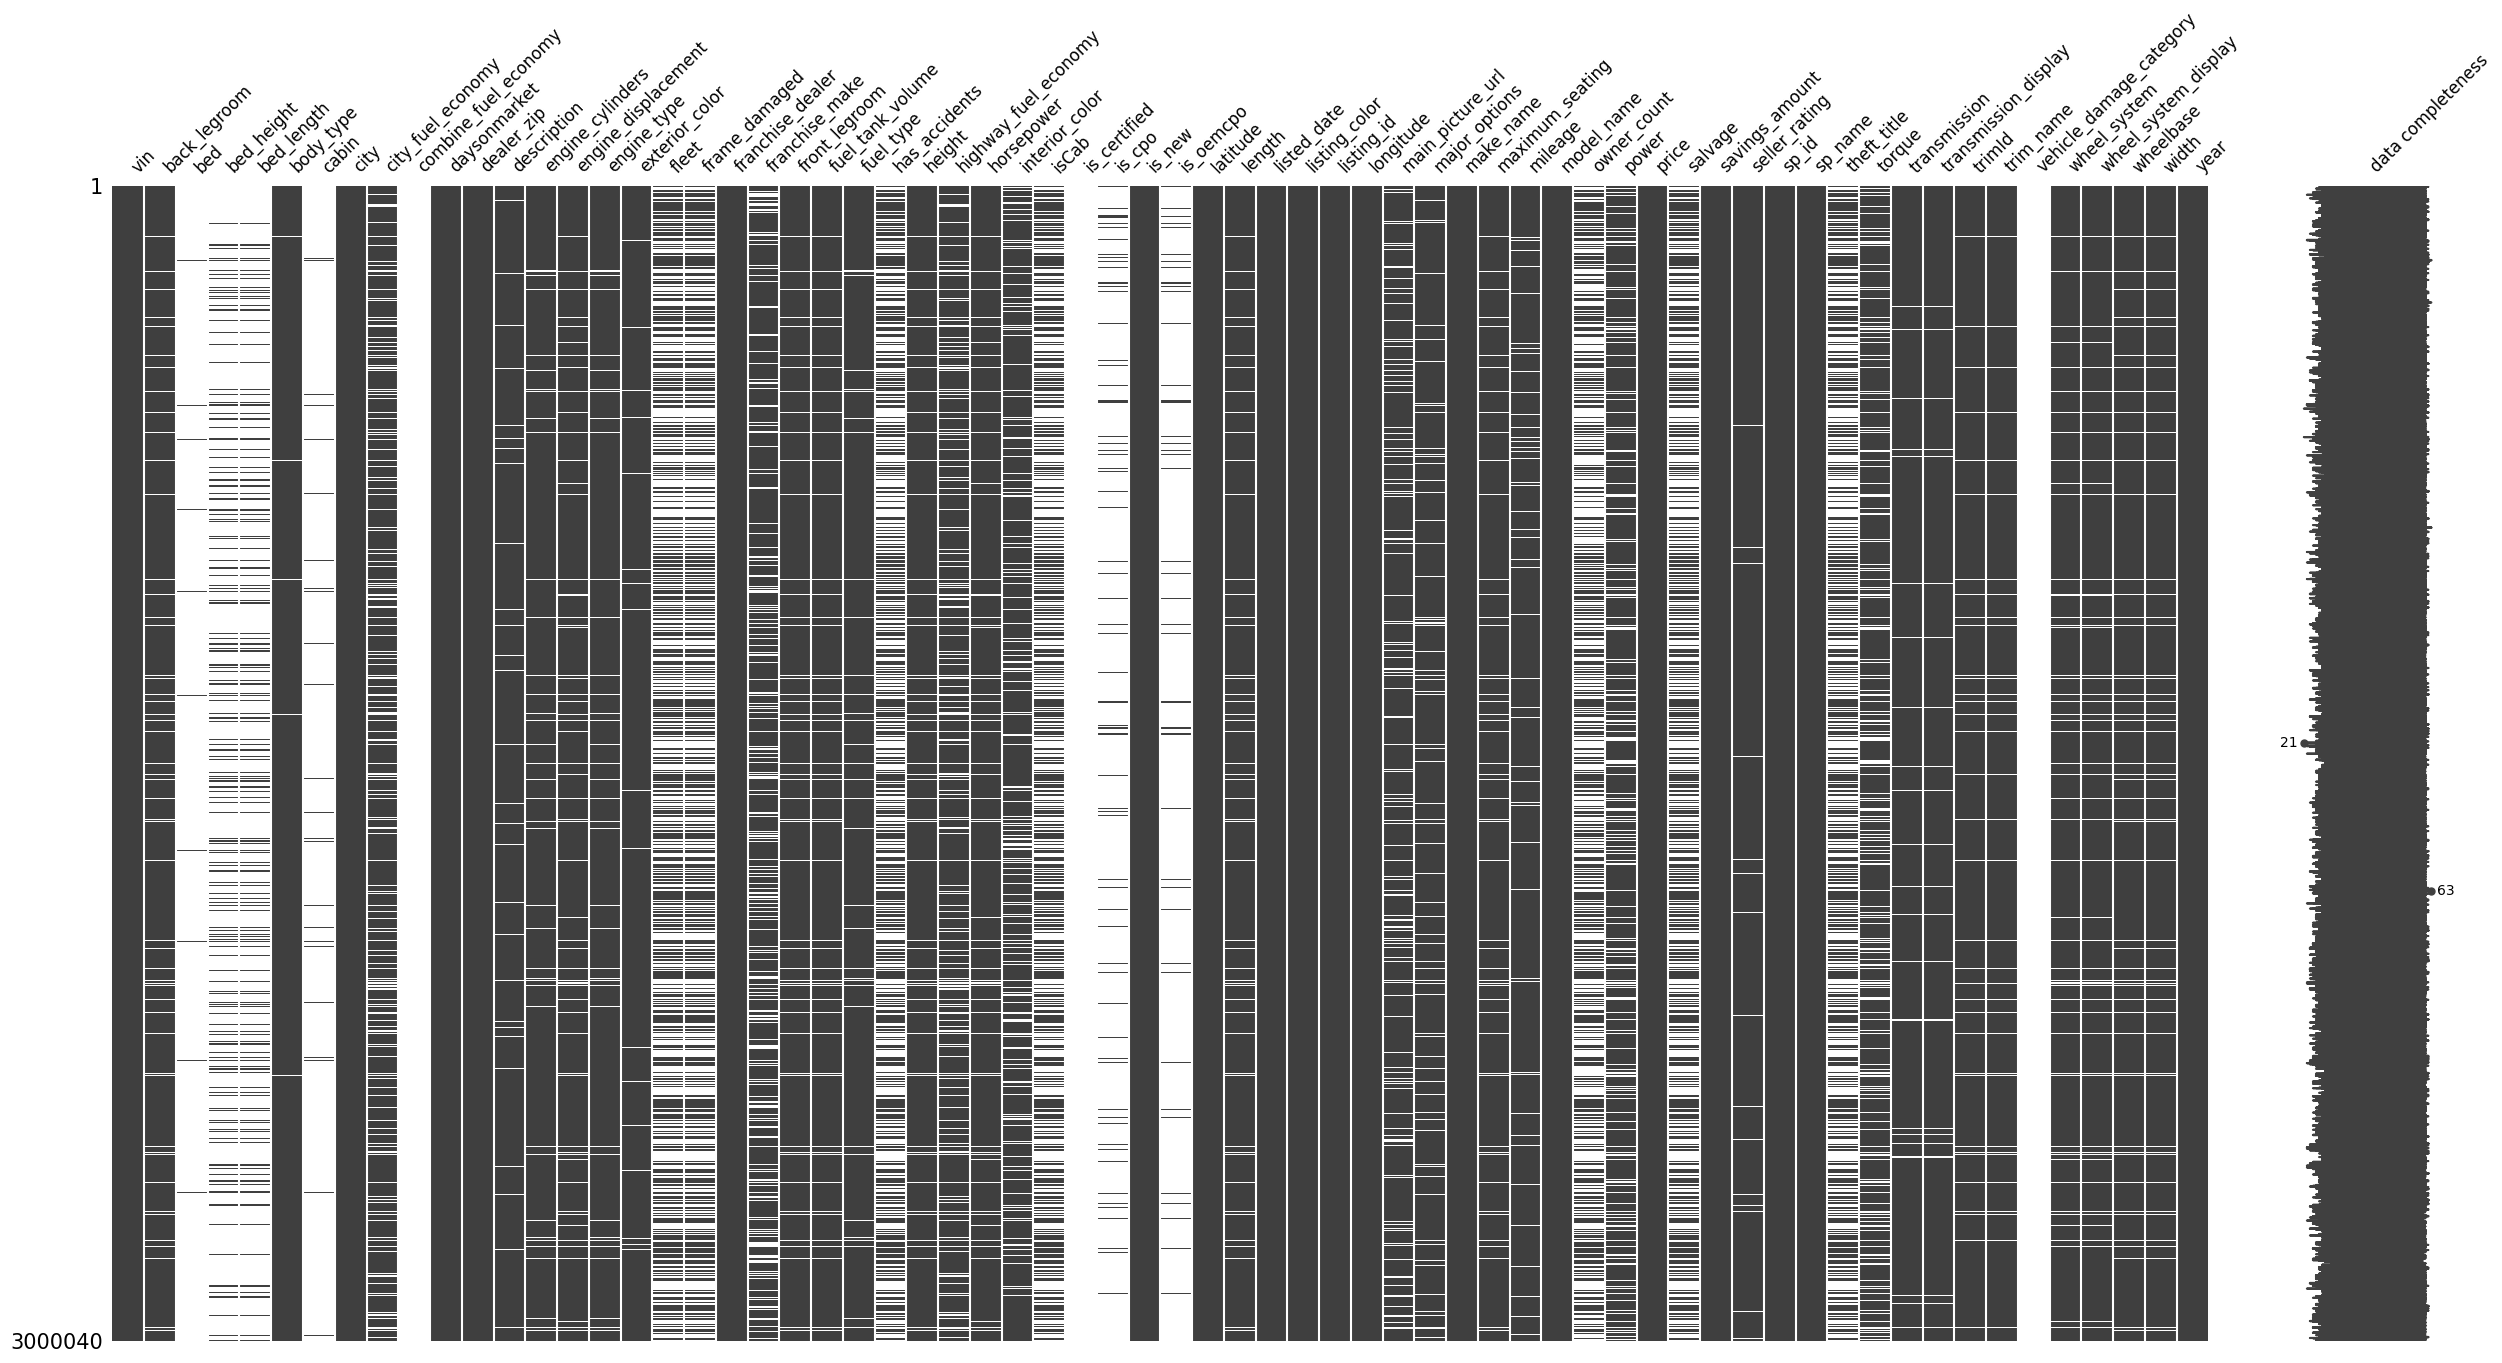

In [7]:
# Visualizzo il grafico dei missing values
msno.matrix(df, figsize=(30, 15), fontsize=12, labels=True)
plt.show()

In [8]:
soglia = 70.0
cols_to_drop = df_stats.columns[df_stats.loc['missing_values_%'] > soglia].tolist()
print(f"Colonne da eliminare (più del {soglia}% di valori mancanti): {cols_to_drop}")

Colonne da eliminare (più del 70.0% di valori mancanti): ['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'is_certified', 'is_cpo', 'is_oemcpo', 'vehicle_damage_category']


In [9]:
df_processed = df.drop(columns=cols_to_drop)
df_processed.shape

(3000040, 57)

In [10]:
colonne_critiche = ['make_name', 'model_name', 'year', 'mileage']

# Elimina le righe dove una delle colonne critiche è nulla
df_processed = df_processed.dropna(subset=colonne_critiche, how='any')

In [11]:
df_processed.shape

(2855653, 57)

In [12]:
df_processed.to_csv('../datasets/processed/used_cars_data_processed.csv', index=False)